In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('matplotlibrc.py')

# Let's first solve the conventional SIR w/this method 

In [2]:
def solve_csir(beta,gamma,N,I0,R0,tf,dt):
    #solves sir conventional model given parameters + initial conditions + tfinal + dt
    n = int((tf/dt) + 1) #number of steps
    S0 = N - I0 - R0
    t = [] #times storage
    S = [] #susceptibles storage
    I = [] #infected storage
    R = [] #recovered storage
    #initial time + initial conditions
    t.append(0)
    S.append(S0)
    I.append(I0)
    R.append(R0)
    #now we do the euler step thing
    for j in range(n):
        sj = S[j] + dt*(-(beta/N) * S[j] * I[j])
        ij = I[j] + dt*((beta/N) * S[j] * I[j] - gamma * I[j])
        rj = R[j] + dt*(gamma * I[j])
        tj = (j+1)*dt
        t.append(tj)
        S.append(sj)
        I.append(ij)
        R.append(rj)
    #we cast everything to numpy arrays
    t = np.array(t)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    #now we plot the results of the sir model
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title('SIR común')
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    n_t = -np.diff(S)
    n_t = np.hstack((0,n_t))
    n_t = n_t.astype(int)
    new_cases_per_day = np.copy(n_t)
    prox_dia = n_t.shape[0]
    a = np.zeros(6,dtype=float) + 1.0
    aux = np.zeros(1)
    i = 0
    while i < 4: #completing until the day t+4 bc im gonna need it later for averaging in 7 days
        aux = np.mean(n_t[prox_dia-7:])
        n_t  = np.hstack((n_t,aux)) #extending n_t up to day t+1
        i= i +1
    r_t = np.zeros(n_t.shape,dtype=float) #here we will store the rt
    dias_aux = np.arange(0,prox_dia+3)
    for i in dias_aux[dias_aux>=6]:
        aux = a[0]*n_t[i-6] + a[1]*n_t[i-5] + a[2]*n_t[i-4] #denominator of the r_t expression
        if(aux==0):
            aux = 1 #the first cases in which the denominator is == 0
        r_t[i] = min(((a[3]*n_t[i-1] + a[4]*n_t[i] + a[5]*n_t[i+1])/(aux)),4) #the rest of the days with limit value
    r_t_seven = np.zeros(prox_dia) #real values for index>=9
    i = 9
    while i < prox_dia:
        r_t_seven[i] = np.mean(r_t[i-3:i+4])
        i = i+1
    plt.title('SIR modificado')
    plt.plot(r_t_seven[9:])
    plt.axhline(y=1,c='r')
    plt.xlabel('Time/days')
    plt.ylabel('R7')
    plt.show()
    print((S+I+R)/N)

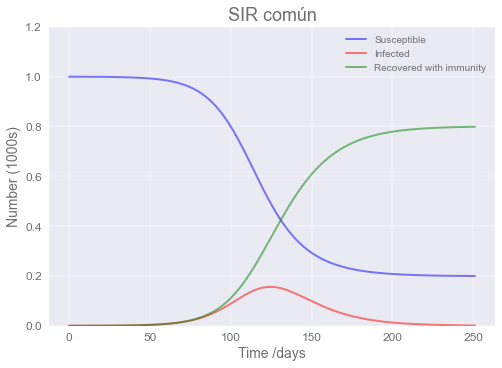

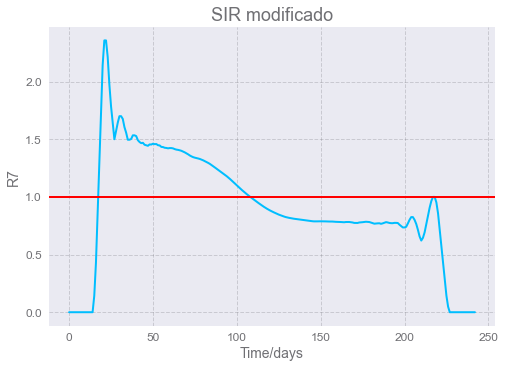

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [3]:
solve_csir(0.15, 0.075,10000.0,1.0,0.0,250.0,1.0)

# Now let's move onto the modified model without a time delay

In [4]:
def solve_msir1(beta0,gamma,alpha,N,I0,R0,A0,tf,dt):
    #solves sir modified sir models without a time delay for now
    n = int((tf/dt) + 1) #number of steps
    S0 = N - I0 - R0
    t = [] #times storage
    S = [] #susceptibles storage
    I = [] #infected storage
    R = [] #recovered storage
    A = [] #new A variable storage (which is dI/dt)
    #initial time + initial conditions
    t.append(0)
    S.append(S0)
    I.append(I0)
    R.append(R0)
    A.append(A0)
    #now we do the euler step thing
    for j in range(n):
        sj = S[j] + dt*((-(beta0 - A[j]*alpha)* S[j] * I[j])/N) #modificado
        ij = I[j] + dt*(A[j]) #modified
        rj = R[j] + dt*(gamma * I[j]) #modified
        tj = (j+1)*dt #the same as before, as it should be
        #auxiliary/complementary calculations
        div = 1 + alpha*S[j]*(I[j]/N)
        t1 = -S[j]*(I[j]/N)*(I[j]/N)*((beta0 - A[j]*alpha)**2)
        t2 = (beta0 - A[j]*alpha)*S[j]*(A[j]/N)
        t3 = -gamma*A[j]
        #calculation of value of aj
        aj = A[j] + ((1/div) * (t1 + t2 + t3))*dt 
        t.append(tj)
        S.append(sj)
        I.append(ij)
        R.append(rj)
        A.append(aj)
    #we cast everything to numpy arrays
    t = np.array(t)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    #now we plot the results of the sir model
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title('SIR modificado 1')
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    n_t = -np.diff(S)
    n_t = np.hstack((0,n_t))
    n_t = n_t.astype(int)
    new_cases_per_day = np.copy(n_t)
    prox_dia = n_t.shape[0]
    a = np.zeros(6) + 1.0
    aux = np.zeros(1)
    i = 0
    while i < 4: #completing until the day t+4 bc im gonna need it later for averaging in 7 days
        aux = np.mean(n_t[prox_dia-7:])
        n_t  = np.hstack((n_t,aux)) #extending n_t up to day t+1
        i= i +1
    r_t = np.zeros(n_t.shape,dtype=float) #here we will store the rt
    dias_aux = np.arange(0,prox_dia+3)
    for i in dias_aux[dias_aux>=6]:
        aux = a[0]*n_t[i-6] + a[1]*n_t[i-5] + a[2]*n_t[i-4] #denominator of the r_t expression
        if(aux==0):
            aux = 1 #the first cases in which the denominator is == 0
        r_t[i] = min(((a[3]*n_t[i-1] + a[4]*n_t[i] + a[5]*n_t[i+1])/(aux)),4) #the rest of the days with limit value
    r_t_seven = np.zeros(prox_dia) #real values for index>=9
    i = 9
    while i < prox_dia:
        r_t_seven[i] = np.mean(r_t[i-3:i+4])
        i = i+1
    plt.title('SIR modificado')
    plt.plot(r_t_seven[9:])
    plt.axhline(y=1,c='r')
    plt.xlabel('Time/days')
    plt.ylabel('R7')
    plt.show()
    print((S+I+R)/N)

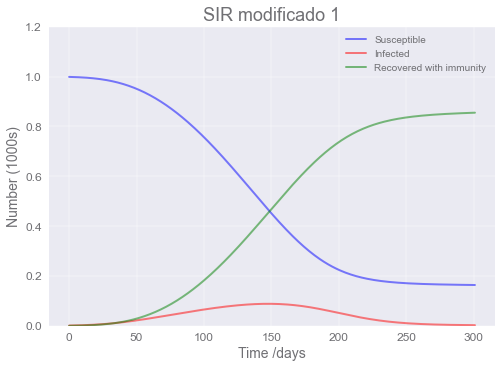

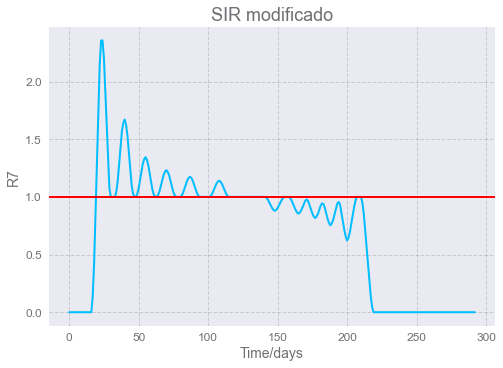

[1.         1.00002657 1.00005318 1.00007984 1.00010654 1.00013329
 1.0001601  1.00018698 1.00021394 1.00024098 1.00026812 1.00029537
 1.00032273 1.00035022 1.00037785 1.00040564 1.00043361 1.00046176
 1.00049012 1.00051871 1.00054753 1.00057661 1.00060598 1.00063564
 1.00066562 1.00069594 1.00072662 1.00075768 1.00078913 1.00082101
 1.00085331 1.00088607 1.0009193  1.00095301 1.00098722 1.00102194
 1.00105719 1.00109298 1.00112931 1.00116619 1.00120364 1.00124166
 1.00128024 1.0013194  1.00135914 1.00139946 1.00144036 1.00148183
 1.00152388 1.0015665  1.00160969 1.00165345 1.00169776 1.00174262
 1.00178804 1.00183399 1.00188047 1.00192748 1.00197501 1.00202305
 1.00207159 1.00212062 1.00217014 1.00222013 1.00227059 1.00232152
 1.00237289 1.00242471 1.00247697 1.00252966 1.00258277 1.00263629
 1.00269022 1.00274455 1.00279928 1.0028544  1.0029099  1.00296578
 1.00302204 1.00307866 1.00313565 1.003193   1.00325071 1.00330877
 1.00336719 1.00342595 1.00348506 1.00354452 1.00360433 1.0036

In [12]:
solve_msir1(0.15, 1./14 ,0.05,1000.0,1.0,0.0,0.1,300,1.0)

# Now let's try to solve the delay version of this one

In [6]:
def solve_msir2(beta0,gamma,alpha,N,I0,R0,A0,delay,tf,dt):
    #solves sir modified sir models without a time delay for now
    n = int((tf/dt) + 1) #number of steps
    S0 = N - I0 - R0
    t = [] #times storage
    S = [] #susceptibles storage
    I = [] #infected storage
    R = [] #recovered storage
    A = [] #A variable storage
    dA = [] #new variable which is storing dA/dt basically
    for j in range(delay-1):
        t.append(0)
        S.append(S0)
        I.append(I0)
        R.append(R0)
        A.append(A0)
        dA.append(0)
    t.append(0)
    S.append(S0)
    I.append(I0)
    R.append(R0)
    A.append(A0)
    dA.append(0)
    #now we do the euler step thing
    for j in np.arange(delay-1,n+delay):
        sj = S[j] + dt*((-(beta0 - A[j-delay]*alpha)* S[j] * I[j])/N) #modified w/delay
        ij = I[j] + dt*(A[j]) #modified w/delay
        rj = R[j] + dt*(gamma * I[j]) #modified w/delay
        tj = (j+1)*dt #the same as before, as it should be
        #auxiliary/complementary calculations
        t1 = -S[j]*(I[j]/N)*(I[j]/N)*((beta0 - A[j-delay]*alpha)**2) 
        t2 = (beta0 - A[j-delay]*alpha)*S[j]*(A[j]/N) #este esta ok tambien
        t3 = -gamma*A[j] #este esta ok
        t4 = -alpha*((S[j]*I[j])/(N))*(dA[j-delay])
        #calculation of value of aj
        aj = A[j] + ((t1 + t2 + t3 + t4))*dt 
        t.append(tj)
        S.append(sj)
        I.append(ij)
        R.append(rj)
        A.append(aj)
        dA.append(t1+t2+t3+t4)
    #we cast everything to numpy arrays
    t = np.array(t)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    #now we plot the results of the sir model
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title('SIR modificado 2')
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    #ax.set_ylim(0.3,0.5)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    #plt.xlim((150,180))
    plt.show()
    n_t = -np.diff(S)
    n_t = np.hstack((0,n_t))
    n_t = n_t.astype(int)
    new_cases_per_day = np.copy(n_t)
    prox_dia = n_t.shape[0]
    a = np.zeros(6) + 1.0
    aux = np.zeros(1)
    i = 0
    while i < 4: #completing until the day t+4 bc im gonna need it later for averaging in 7 days
        aux = np.mean(n_t[prox_dia-7:])
        n_t  = np.hstack((n_t,aux)) #extending n_t up to day t+1
        i= i +1
    r_t = np.zeros(n_t.shape,dtype=float) #here we will store the rt
    dias_aux = np.arange(0,prox_dia+3)
    for i in dias_aux[dias_aux>=6]:
        aux = a[0]*n_t[i-6] + a[1]*n_t[i-5] + a[2]*n_t[i-4] #denominator of the r_t expression
        if(aux==0):
            aux = 1 #the first cases in which the denominator is == 0
        r_t[i] = min(((a[3]*n_t[i-1] + a[4]*n_t[i] + a[5]*n_t[i+1])/(aux)),4) #the rest of the days with limit value
    r_t_seven = np.zeros(prox_dia) #real values for index>=9
    i = 9
    while i < prox_dia:
        r_t_seven[i] = np.mean(r_t[i-3:i+4])
        i = i+1
    plt.title('SIR modificado')
    plt.plot(r_t_seven[9:])
    plt.axhline(y=1,c='r')
    plt.xlabel('Time/days')
    plt.ylabel('R7')
    plt.show()
    #now we start with the risk diagram 
    a_t = np.zeros(prox_dia) #real values for index >= 13
    i = 13
    while i < prox_dia:
        a_t[i] = np.sum(n_t[i-13:i+1]) 
        i = i+1
    a_t = a_t * (100000/n) #where n is the population of the simulation
    riesgo = a_t * r_t_seven
    plt.title('SIR modificado')
    plt.plot(a_t[13:],r_t_seven[13:],'-or',markersize=5)
    plt.show()
    print((S+I+R)/N)

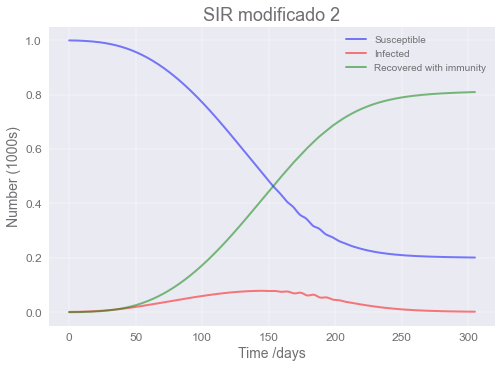

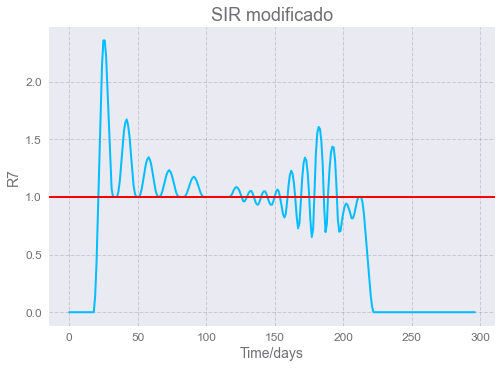

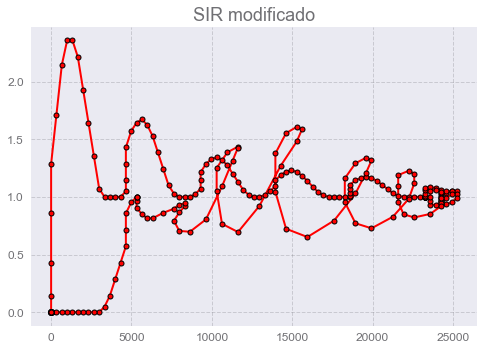

[1.         1.         1.         1.         1.00003014 1.00006029
 1.00009044 1.00012059 1.00015075 1.00018146 1.00021226 1.00024317
 1.0002742  1.00030538 1.00033664 1.00036807 1.00039966 1.00043145
 1.00046344 1.00049567 1.00052816 1.00056092 1.00059399 1.00062738
 1.00066112 1.00069523 1.00072973 1.00076465 1.0008     1.00083581
 1.00087209 1.00090886 1.00094611 1.00098387 1.00102214 1.0010609
 1.00110017 1.00113993 1.00118016 1.00122086 1.001262   1.00130356
 1.00134553 1.00138786 1.00143054 1.00147354 1.00151682 1.00156037
 1.00160414 1.00164812 1.00169227 1.00173656 1.00178097 1.00182547
 1.00187004 1.00191464 1.00195926 1.00200388 1.00204846 1.00209299
 1.00213745 1.00218182 1.00222608 1.00227022 1.00231421 1.00235805
 1.00240171 1.00244519 1.00248846 1.00253152 1.00257435 1.00261695
 1.00265929 1.00270138 1.0027432  1.00278474 1.00282599 1.00286695
 1.00290759 1.00294793 1.00298794 1.00302762 1.00306698 1.00310599
 1.00314466 1.00318297 1.00322093 1.00325852 1.00329573 1.00333

In [7]:
solve_msir2(0.15, 0.075,0.05,1000,1,0,0.1,4,300,1)
#cambiando el delay se observan otras cosas!!! (cambiarlo a dos x ejemplo se dejan de ver los loops)

In [8]:
#